# Honey Production Prediction Using Linear Regression
##### Roger Qiu - 2/15/2022
### Introduction
In this project we will build a simple linear regression machine learning model that takes historical honey production and use it to predict production for future years.
### The Data
To begin, let's load and inspect our data from a csv, clean it and visualize it in a scatterplot. 

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]]
0    5.105093e+06
1    4.706674e+06
2    5.106000e+06
3    4.221545e+06
4    3.892386e+06
5    4.122091e+06
Name: totalprod, dtype: float64


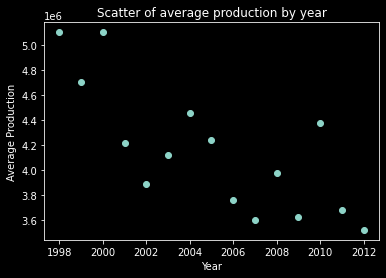

In [2]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the csv (honeyproduction.csv) that shows honey production stats per state
df = pd.read_csv("honeyproduction.csv")
print(df.head()) # inspect the dataframe

# Columns are:
# state, number of honey producing colonies, yield per colony, total production, stocks held by producers, average price per pound, value of production, year

# We want to group years by average total production that year
# So our x axis will have year, y axis has average production
# set prod per by as a new dataframe grouped by year and average totalproduction. reset the index gives us list of integers on left
prod_per_year = df.groupby("year").totalprod.mean().reset_index()
prod_per_year.head()
# prints out each year and its total production average

# get a list of all the years for our x axis
x = prod_per_year["year"] 
#print(x)

# rotates x into a 1-d array, now we have JUST our x values in a list
x = x.values.reshape(-1,1)
print(x[0:6])

# get a list of all the average production per year
y = prod_per_year["totalprod"]
print(y[0:6])

# plot the scatter chart with year as y, average prod as x, 
plt.xlabel("Year")
plt.ylabel("Average Production")
plt.scatter(x,y)
plt.title("Scatter of average production by year")
plt.show()

### Linear Regression Model
We can see from the scatter plot above that production seems to be going down every year, but to what extent and how can we predict what it would be in 2042? To do this lets build our linear regression model and fit the points in and analyze the results. 

Coef is -88303.18915238192
Intercept is 181208083.10732976
y_predict:[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


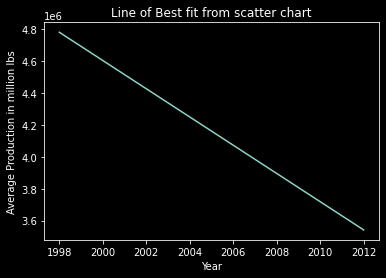

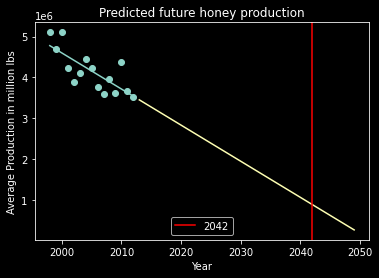

Estimated honey production for year 2042 is 892971 pounds


In [3]:
# load sklearn library
from sklearn import linear_model

# create the linear regression model and set as regr
regr = linear_model.LinearRegression()

# feed x (years) and y (avg production) into the data using fit 
regr.fit(x,y)

# print the coefficient (slope) and intercept of regr, coef needs 0 because sometimes there can be more than 1
print("Coef is " + str(regr.coef_[0]))
print("Intercept is " + str(regr.intercept_))

# predict y (production) given x (year), using predict method as mx+b 
y_predict = regr.predict(x)
print("y_predict:" + str(y_predict)) # all the y values for our line of best fit given x (past years).

# plot line of best fit to chart as a line chart
plt.plot(x,y_predict)
plt.xlabel("Year")
plt.ylabel("Average Production in million lbs")
plt.title("Line of Best fit from scatter chart")
plt.show()

# create future years for prediction as the range between 2013 and 2050
x_future = np.array(range(2013, 2050))
# print(x_future)

# reshape future years to 1d array 
x_future = x_future.reshape(-1,1)
# print(x_future)

# predicted future year productions y given future dates 2013 to 2050
future_predict = regr.predict(x_future)
# print(future_predict)

# plot scatter along with current and predicted future production line of best fit
# added a line in year 2042 to show predicted production
plt.plot(x,y_predict)
plt.xlabel("Year")
plt.ylabel("Average Production in million lbs")
plt.scatter(x,y)
plt.plot(x_future, future_predict)
plt.axvline(2042, color="red", label="2042")
plt.title("Predicted future honey production")
plt.legend(loc=8)
plt.show()

# flatten function to turn arrays back to list so interp can read it
flattened_x = x_future.flatten()
flattened_y = future_predict.flatten()

# now to find the intersection point: 
# given year (x point we want), the range of years (all x values) and predicted production (predicted y) predict production value at x
year = 2042
prod_by_year = np.interp(year, flattened_x, future_predict)
print("Estimated honey production for year " + str(year) + " is " + str(round(prod_by_year)) + " pounds")
# estimated production is 892,970 pounds of honey

### Analysis
But how accurate is our line of best fit and prediction? To find this we look at a few statistical metrics our OLS (Ordinary Least Squares) Results : 
- Dependent Variable: Is one that is going to depend on other variables. In this regression analysis Honey Production is our dependent variable because we want to analyse the effect of (time) X on (Honey Production) Y.
- Coefficient: tells the change in Y for a unit change in X. So in our case the change in honey production per change in year.
- RSE (or just Standard Error): is the estimate of standard deviation of error between each point and the line of best fit, usually the lower this amount, the better the line of fit. We can this amount by the mean of our dependent variable (honey) to get our average %. RSE % higher than 50% are not used as the standard error is too high. Less than 30% is considered to have good reliability.
- R-squared: tells us that how much percentage variation dependent variable (Honey) can be explained by independent variable (Time). The higher this amount, the better the regression.
- P-Value: The higher the p-value and the less significant the findings are. Usually we want a p-value is 0.05 or less. This means that if there was no relationship between the variables, we can find this result in only 1 out of of 5000 random samples.

In [7]:
# load stats model and scipy libraries
import statsmodels.formula.api as smf
from scipy import stats

# create model as smf.OLS that takes total production as our y and year as our x with df as our data
# fit the model as results and then print the summary
model = smf.ols(formula='totalprod ~ year', data = df)
results = model.fit()
print(results.summary())

rse = 63700 / df["totalprod"].mean()
print(rse)

# Dependent Variable: total production column
# Coefficient:-88,580
# RSE %: 1.52%
# R-Squared: 0.003
# P-Value: 0.165

                            OLS Regression Results                            
Dep. Variable:              totalprod   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.932
Date:                Fri, 05 Aug 2022   Prob (F-statistic):              0.165
Time:                        14:59:50   Log-Likelihood:                -10743.
No. Observations:                 626   AIC:                         2.149e+04
Df Residuals:                     624   BIC:                         2.150e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.818e+08   1.28e+08      1.423      0.1

### Conclusion
Using our linear regression model, we were able to find the line of best fit by finding the intercept and coefficient from the given values. Using the line of best fit, we found what future years production might look like, and using that we found that production in 2042 is estimated to by 892971. As for the statistical accuracy of our model: 
- Our coefficient is -88,580, meaning for every year that passes, our regression predicts that much less of honey production.
- Our R-Squared is only 0.001 meaning only 0.1% of the honey production have be explained by years.
- The RSE % is only 1.52%, being much less than 30%, this is a good sign of a reliable fit.